In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import joblib 
import seaborn as sb

In [4]:
df =  pd.read_csv('datasets\knn.csv')

<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
C:\Users\avdhoot\AppData\Local\Temp\ipykernel_14308\2888083168.py:1: SyntaxWarning: invalid escape sequence '\k'
  df =  pd.read_csv('datasets\knn.csv')


In [9]:
df.isnull().sum()
df.duplicated().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 732.0+ bytes


In [32]:
a = '51kg'
b = (lambda a:str(a).replace("kg"," "))(a)
b

'51 '

In [51]:
df['Weight(x2)kg'] = df['Weight(x2)kg'].apply((lambda a: str(a).replace("kg",""))).astype('int')
df['Height(y2)cm'] = df['Height(y2)cm'].apply((lambda a: str(a).replace("cm",""))).astype('int')

In [ ]:
X = df[['Weight(x2)kg','Height(y2)cm']]
y = df['Class']

In [94]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,2].values
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [71]:
model = KNeighborsClassifier()

In [72]:
model.fit(X,y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [78]:
y_pred = model.predict(X)

In [133]:
pred= [[58.5,167.5]]

model.predict(pred)
pred

[[58.5, 167.5]]

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.92

In [89]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(y,y_pred)
pd.DataFrame(a,index=['Normal_A','Overweight_A','Underweight_A'],columns=['Normal_p','Overweight_p','Unerweight_p'])

,Normal_p,Overweight_p,Unerweight_p
Normal_A,9,0,1
Overweight_A,1,6,0
Underweight_A,0,0,8


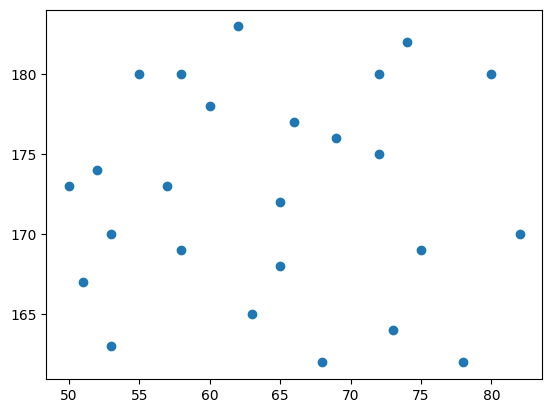

In [93]:
plt.scatter(df['Weight(x2)kg'],df['Height(y2)cm'])

In [96]:
df.sample()

,Weight(x2)kg,Height(y2)cm,Class
18,57,173,Normal


In [102]:
df1 = df[df['Class']== 'Normal'] 
df2 = df[df['Class']== 'Underweight']
df3 = df[df['Class']=='Overweight']

In [136]:
pred[0][0]
pred[0][1]

167.5

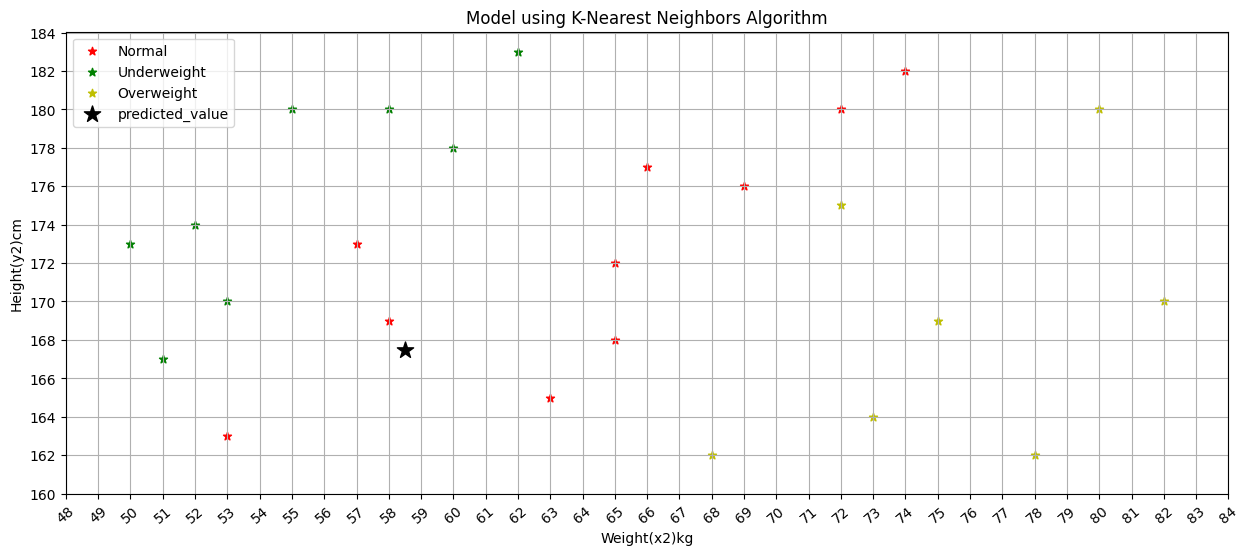

In [140]:
plt.figure(figsize=(15,6))

plt.scatter(df1['Weight(x2)kg'],df1['Height(y2)cm'],marker=('*'),color = 'r',label= "Normal")
plt.scatter(df2['Weight(x2)kg'],df2['Height(y2)cm'],marker=('*'),color = 'g',label= "Underweight")
plt.scatter(df3['Weight(x2)kg'],df3['Height(y2)cm'],marker=('*'),color = 'y',label= "Overweight")
plt.scatter(pred[0][0],pred[0][1],marker= '*',label= "predicted_value",color = 'k',s=150)
plt.xticks(np.arange(48,85,1),rotation =40)
plt.yticks(np.arange(160,186,2))
plt.legend()
plt.xlabel('Weight(x2)kg')
plt.ylabel('Height(y2)cm')
plt.grid()
plt.title('Model using K-Nearest Neighbors Algorithm')
plt.show()